# 計算機程式期末報告-吉娃娃很姬芭

## 一、介紹：

    ·組員與分工介紹
    ·題目動機
    ·流程介紹

## 二、實際進行：

    1.資料來源
    2.讀入相關套件
    3.讀入資料集&整理成訓練和測試資料
    4.建立模型並訓練
    5.資料視覺化
    6.結語

# 一、
### 組員/分工：

統計二 107304012 林為葶 : 寫爬蟲、資料篩選、資料標記、寫註解

統計二 107304039 林文龍 : 資料搜尋，建模、爬蟲、資料篩選、資料標記、視覺化結果、寫註解

統計三 106304037 卜介夫：資料篩選、寫註解

## 為什麼會做這個主題（主題發想）？
我們三位都很討厭吉娃娃，明明都是狗狗，為什麼柴犬這麼可愛而吉娃娃卻如此的忍人厭呢？明明都是四隻腳的動物，為什麼給人的感覺差這麼多？而在AI的世界當中，難道四隻腳，會汪汪叫的動物都注定被歸在一類嗎？
    舉例來說，一隻幼年的吉娃娃或許與大多數狗狗的幼年長的類似，但在長大之後卻有截然不同的命運，難道我們一定要等到她長大才能定讞他的喜惡程度嗎？又或是很多吉娃娃是個性不討喜，難道必須要實際相處過後，才能讓大家意識到吉娃娃支亂嗎？為了防止這件事，我們就想到來用AI做一個分辨吉娃娃的程式，只要丟照片進去，馬上可以知道是不是吉娃娃，這樣就算是幼小的，或是還沒有開始亂叫的吉娃娃都能被我們分辨出來，於以警告，這個計畫實為全天下人的福祉啊！

## 流程介紹：
(1)	資料蒐集   (2)資料編碼、分類  (3)資料訓練  (4)結論
1.	我們使用百度搜圖和shutterstock來爬蟲抓取圖片，因為若用google圖片來爬取的話會有被鎖ip的疑慮，並且這兩個網站的圖片資源不亞於google。我們總共爬取了兩萬張吉娃娃的照片、一萬五千張其他十種狗的照片。
2.	首先我們將照片手動篩選不符合那種類別的品種，刪除資訊不對的照片==>透過人工篩選到7552張吉娃娃和9012張其他十種狗的照片。再來透過label的相關程式碼來幫照片做一個分類、編碼。讓每一張照片都能符合到相對應的品種，並且將相同分類的照片存入同一個資料夾。故最後得到十一種狗的分類資料夾。
3.	我們透過CNN來訓練資料模型，並查看預測成果和結果視覺化
4.	結論


## 資料來源:
(1)百度搜圖、shutterstock

(2)Label相關程式參考資料 : https://medium.com/%E7%94%A8%E5%8A%9B%E5%8E%BB%E6%84%9B%E4%B8%80%E5%80%8B%E4%BA%BA%E7%9A%84%E8%A9%B1-%E5%BF%83%E4%B9%9F%E6%9C%83%E7%97%9B%E7%9A%84/%E9%BB%98%E9%BB%98%E5%9C%B0%E5%AD%B8deep-learning-3-e9e90c633722

(3)爬蟲程式碼參考資料 :
https://medium.com/%E4%BC%81%E9%B5%9D%E4%B9%9F%E6%87%82%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88/python%E7%88%AC%E8%9F%B2-python-selenium-%E8%87%AA%E5%8B%95%E5%8C%96%E7%88%AC%E5%8F%96%E5%A4%A7%E9%87%8F%E5%9C%96%E7%89%87-a35d3c89c6d1

https://github.com/chuanenlin/shutterscrape

(4)模型與視覺化參考資料
https://medium.com/%E7%94%A8%E5%8A%9B%E5%8E%BB%E6%84%9B%E4%B8%80%E5%80%8B%E4%BA%BA%E7%9A%84%E8%A9%B1-%E5%BF%83%E4%B9%9F%E6%9C%83%E7%97%9B%E7%9A%84/%E9%BB%98%E9%BB%98%E5%9C%B0%E5%AD%B8-deep-learning-6-%E9%80%8F%E9%81%8E%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF%E9%80%B2%E8%A1%8C%E8%B2%93-%E7%8B%97%E5%9C%96%E5%83%8F%E8%BE%A8%E8%AD%98-%E4%B8%A6%E8%A6%96%E8%A6%BA%E5%8C%96%E5%85%B6%E7%B5%90%E6%9E%9C-a13d7577a144

### 1. 讀入爬蟲並篩選過的資料

In [2]:
import os
import numpy as np
from PIL import Image
import keras

size = (128,128)
chihuahua_img_list=[]
Hiromi_img_list=[]
pug_img_list=[]
pit_bull_img_list=[]
Labrador_img_list=[]
Border_Collie_img_list=[]
kerGee_img_list=[]
Maltese_img_list=[]
Poodle_img_list=[]
Golden_Retriever_img_list=[]
Dachshund_img_list=[]

base_path = r'D:\計算機程式\專案'
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".jpg"):
            filename = os.path.join(root, file)
            file_size = os.path.getsize(filename)
            category_name = os.path.basename(root)
            if file_size >= 2048:
                im = Image.open(filename)
                if im.mode=='RGB':
                    im=im.resize(size,Image.BILINEAR)
                    imarray = np.array(im)
                    imarray = (imarray - np.min(imarray))/(np.max(imarray)-np.min(imarray))
                    if category_name == '博美犬':
                        Hiromi_img_list.append(imarray)
                    elif category_name == "吉娃娃":
                        chihuahua_img_list.append(imarray)
                    elif category_name == "巴哥犬":
                        pug_img_list.append(imarray)
                    elif category_name == "彼特犬":
                        pit_bull_img_list.append(imarray)
                    elif category_name == "拉不拉多":
                        Labrador_img_list.append(imarray)
                    elif category_name == "牧羊犬":
                        Border_Collie_img_list.append(imarray)
                    elif category_name == "柯基":
                        kerGee_img_list.append(imarray)
                    elif category_name == "馬爾濟斯":
                        Maltese_img_list.append(imarray)
                    elif category_name == "貴賓犬":
                        Poodle_img_list.append(imarray)
                    elif category_name == "黃金獵犬":
                        Golden_Retriever_img_list.append(imarray)
                    elif category_name == "臘腸犬":
                        Dachshund_img_list.append(imarray)


##要把照片做疊加的話要先做成array的形式

Hiromi_img_arr = np.asarray(Hiromi_img_list)
chihuahua_img_arr = np.asarray(chihuahua_img_list) 
pug_img_arr = np.asarray(pug_img_list)
pit_bull_img_arr = np.asarray(pit_bull_img_list) 
Labrador_img_arr = np.asarray(Labrador_img_list)
Border_Collie_img_arr = np.asarray(Border_Collie_img_list) 
kerGee_img_arr = np.asarray(kerGee_img_list)
Maltese_img_arr = np.asarray(Maltese_img_list) 
Poodle_img_arr = np.asarray(Poodle_img_list)
Golden_Retriever_img_arr = np.asarray(Golden_Retriever_img_list) 
Dachshund_img_arr = np.asarray(Dachshund_img_list)

##把資料分成11類
Hiromi_img_label = np.ones(Hiromi_img_arr.shape[0])*0
chihuahua_img_label = np.ones(chihuahua_img_arr.shape[0])*1
pug_img_label = np.ones(pug_img_arr.shape[0])*2
pit_bull_img_label = np.ones(pit_bull_img_arr.shape[0])*3
Labrador_img_label = np.ones(Labrador_img_arr.shape[0])*4
Border_Collie_img_label = np.ones(Border_Collie_img_arr.shape[0])*5
kerGee_img_label = np.ones(kerGee_img_arr.shape[0])*6
Maltese_img_label = np.ones(Maltese_img_arr.shape[0])*7
Poodle_img_label = np.ones(Poodle_img_arr.shape[0])*8
Golden_Retriever_img_label = np.ones(Golden_Retriever_img_arr.shape[0])*9
Dachshund_img_label = np.ones(Dachshund_img_arr.shape[0])*10

## one-hot encoding
img_arr   = np.concatenate((Hiromi_img_arr, chihuahua_img_arr, pug_img_arr, pit_bull_img_arr, Labrador_img_arr, \
                           Border_Collie_img_arr, kerGee_img_arr, Maltese_img_arr, Poodle_img_arr, \
                           Golden_Retriever_img_arr, Dachshund_img_arr), axis = 0)
img_label = np.concatenate((Hiromi_img_label, chihuahua_img_label, pug_img_label, pit_bull_img_label, Labrador_img_label, \
                           Border_Collie_img_label, kerGee_img_label, Maltese_img_label, Poodle_img_label, \
                           Golden_Retriever_img_label, Dachshund_img_label), axis = 0) 
img_label = keras.utils.to_categorical(img_label, num_classes = 11)

Using TensorFlow backend.


### 2. 把資料打散

In [3]:
import random
temp = list(zip(img_arr, img_label))
random.shuffle(temp)
img_arr, img_label = zip(*temp)
img_arr=np.asarray(img_arr)
img_label=np.asarray(img_label)

### 3. 把資料分成 20%的測試組 和 80%的訓練組

In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(img_arr, img_label, test_size=0.2, random_state=42)

### 4. 建模型

In [7]:
#%% Create Model
from keras.models import Sequential
from keras.layers import Dense, SpatialDropout2D, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop
from keras.callbacks import EarlyStopping

# Generate model
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128,128,3),padding='same',name='block1_conv2_1'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',name='block1_conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block1_MaxPooling'))
model.add(SpatialDropout2D(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same',name='block2_conv2_1'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',name='block2_conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block2_MaxPooling'))
model.add(SpatialDropout2D(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu',name='final_output_1'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',name='final_output_2'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='sigmoid',name='class_output'))
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'
model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
EStop = EarlyStopping(monitor='val_acc', min_delta=0, 
                      patience=10, verbose=1, mode='auto')

### 5. 訓練模型

In [13]:
#%% Training and saving

#因為圖片檔案太大電腦記憶體不夠會當機，所以batch size只有設30，validation_split=0.005
history = model.fit(train_data, train_label, batch_size=30, epochs=20,shuffle=True, validation_split=0.005,callbacks=[EStop])

import time
timestr = time.strftime("%Y%m%d_%H%M%S")
model.save('catdog_model_{}.h5'.format(timestr)) 

Train on 5826 samples, validate on 30 samples
Epoch 1/20
5826/5826 [==============================] - 57s 10ms/step - loss: 0.3833 - accuracy: 0.8491 - val_loss: 0.2402 - val_accuracy: 0.9303
Epoch 2/20


C:\Users\ASUS\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5826/5826 [==============================] - 43s 7ms/step - loss: 0.2761 - accuracy: 0.9148 - val_loss: 0.2111 - val_accuracy: 0.9424
Epoch 3/20
5826/5826 [==============================] - 43s 7ms/step - loss: 0.2384 - accuracy: 0.9322 - val_loss: 0.1736 - val_accuracy: 0.9455
Epoch 4/20
5826/5826 [==============================] - 43s 7ms/step - loss: 0.2233 - accuracy: 0.9377 - val_loss: 0.1687 - val_accuracy: 0.9424
Epoch 5/20
5826/5826 [==============================] - 43s 7ms/step - loss: 0.2133 - accuracy: 0.9395 - val_loss: 0.1725 - val_accuracy: 0.9424
Epoch 6/20
5826/5826 [==============================] - 43s 7ms/step - loss: 0.2079 - accuracy: 0.9405 - val_loss: 0.1738 - val_accuracy: 0.9455
Epoch 7/20
5826/5826 [==============================] - 43s 7ms/step - loss: 0.2025 - accuracy: 0.9410 - val_loss: 0.1639 - val_accuracy: 0.9424
Epoch 8/20
5826/5826 [==============================] - 43s 7ms/step - loss: 0.1988 - accuracy: 0.9414 - val_loss: 0.1609 - val_accuracy: 0.9

心中小劇場:

    第一次訓練準確率就不錯，來看看結果視覺化長什麼樣子

##### 本來想要看模型的訓練準確率和loss的，但到交作業之前一直解決不了，之後問問助教怎麼辦

In [24]:
# Model Structure
from keras.utils import plot_model
plot_model(model, to_file='model_{}.png'.format(timestr),show_shapes=True, show_layer_names=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

##### 試第二種方法也不行

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

##### 因為前面沒有成功，所以圖片生成不出來

In [23]:
# Training History
import collections
import pandas as pd
hist = history.history

for key, val in hist.items(): # Count the number of epoch
    numepo = len(np.asarray(val))
    break
hist = collections.OrderedDict(hist)
pd.DataFrame(hist).to_excel('model_{}_history.xlsx'.format(timestr), index=True)

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('Model accuracy_{}.png'.format(timestr))
plt.cla()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('Model loss_{}.png'.format(timestr))
plt.cla()

KeyError: 'acc'

## 6. 資料結果視覺化

#### (1) 嘗試上一堂演講時學長講到的 confusion matrix

In [26]:
#%% Confusion Matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes_x,classes_y,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
##    """
##    This function prints and plots the confusion matrix.
##    Normalization can be applied by setting `normalize=True`.
##    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.clf()
    plt.cla()
    plt.style.use('default')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.grid(False)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks_x = np.arange(len(classes_x))
    tick_marks_y = np.arange(len(classes_y))
    plt.xticks(tick_marks_x, classes_x, rotation=45)
    plt.yticks(tick_marks_y, classes_y)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(title+'.png',dpi=350 ,bbox_inches='tight')
    plt.close()

test_pred  = model.predict(test_data)
cnf_matrix = confusion_matrix(np.argmax(test_label, axis=1).reshape(-1,1),
                              np.argmax(test_pred, axis=1).reshape(-1,1))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix,["巴哥犬", "彼特犬","拉不拉多","牧羊犬","柯基","馬爾濟斯","博美犬","貴賓犬","黃金獵犬", \
                                  "臘腸犬",'吉娃娃'],["巴哥犬", "彼特犬","拉不拉多","牧羊犬","柯基","馬爾濟斯","博美犬",\
                                                "貴賓犬","黃金獵犬","臘腸犬",'吉娃娃'],normalize=True,\
                        title='Confusion Matrix Nor')


Normalized confusion matrix
[[0.   0.   0.   0.13 0.03 0.   0.   0.67 0.07 0.1  0.  ]
 [0.   0.92 0.01 0.   0.   0.01 0.   0.04 0.01 0.   0.  ]
 [0.   0.05 0.36 0.1  0.13 0.07 0.   0.2  0.06 0.02 0.  ]
 [0.   0.01 0.12 0.48 0.08 0.04 0.   0.15 0.09 0.01 0.  ]
 [0.   0.02 0.19 0.15 0.17 0.05 0.02 0.31 0.07 0.02 0.  ]
 [0.   0.05 0.05 0.05 0.04 0.68 0.02 0.1  0.02 0.   0.  ]
 [0.   0.03 0.15 0.12 0.07 0.08 0.05 0.35 0.1  0.05 0.  ]
 [0.   0.02 0.08 0.04 0.04 0.04 0.   0.72 0.04 0.02 0.  ]
 [0.   0.04 0.09 0.17 0.1  0.02 0.02 0.31 0.23 0.01 0.  ]
 [0.   0.04 0.11 0.17 0.1  0.06 0.   0.28 0.18 0.06 0.  ]
 [0.   0.04 0.1  0.31 0.15 0.04 0.04 0.1  0.19 0.02 0.  ]]


C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24052 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25289 missing from current

心中小劇場:
    
    結果好像不是很好，但對於confusion matrix不是很懂，不知道要怎麼做會比較好，之後努力研究

#### (2) 進行t-sne降維，並將結果可視化

1464/1464 [==============================] - 8s 5ms/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1464 samples in 0.033s...
[t-SNE] Computed neighbors for 1464 samples in 0.254s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1464
[t-SNE] Computed conditional probabilities for sample 1464 / 1464
[t-SNE] Mean sigma: 1.350793
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.773903
[t-SNE] KL divergence after 1000 iterations: 1.071484


C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24052 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25289 missing from current

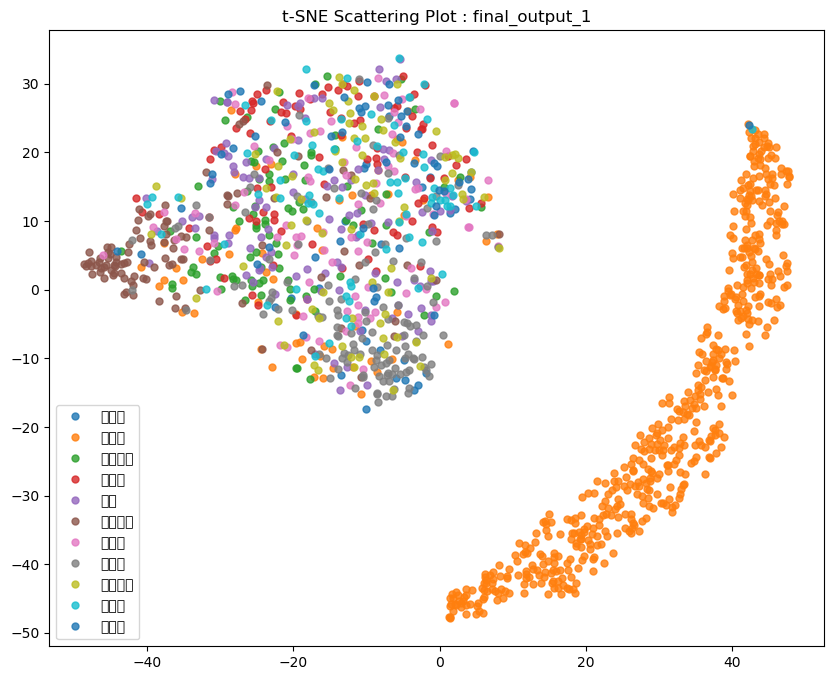

In [29]:
#%% t-SNE  #先用test_data來做  
from keras.models import Model
from sklearn.manifold import TSNE

def plot_tSNE(model,layername,input_data,input_label,modelname='Model',label_name=['label one']):
    batch_size=64
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=model.get_layer(layername).output)
    intermediate_output = intermediate_layer_model.predict(
            input_data, batch_size=batch_size, verbose=1)
    
    Y = TSNE(n_components=2, init='random', random_state=0, perplexity=30, 
             verbose=1).fit_transform(intermediate_output.reshape(intermediate_output.shape[0],-1))
    #
    #Reshape the result of t-SNE for easy to use
    #train_label_draw = keras.utils.to_categorical(train_label_draw, num_classes=(label_for_draw+1))
    #test_label_draw = keras.utils.to_categorical(test_label_draw, num_classes=(label_for_draw+1))
    
    layer_output_label = np.argmax(input_label, axis=1)
    df = pd.DataFrame(dict(x=Y[:,0], y=Y[:,1], label=layer_output_label))
    groups = df.groupby('label')
    
    # Plot tSNE
    plt.cla()
    plt.clf()
    plt.cla()
    plt.close()
    fig, ax = plt.subplots(figsize=(10,8))
    
    ax.margins(0.05)  # Optional, just adds 5% padding to the autoscaling
    for label, group in groups:
        name = label_name[label]
        point,=ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name, alpha=0.8)
    
    plt.title('t-SNE Scattering Plot : {}'.format(layername))
    ax.legend(prop={'size': 10})
    fig.savefig(modelname +'_tSNE_{}.png'.format(layername),transparent=False, dpi=350)
    
    # Save tSNE Result
    writer = pd.ExcelWriter(modelname + '_tSNE_{}.xlsx'.format(layername))
    df.to_excel(writer,'Intensity',float_format='%.2f') # float_format 控制精度
    writer.save()


plot_tSNE(model,
          layername = 'final_output_1',
          input_data = test_data,
          input_label = test_label,
          modelname = '{}'.format(timestr),
          label_name = ["巴哥犬", "彼特犬","拉不拉多","牧羊犬","柯基","馬爾濟斯","博美犬","貴賓犬","黃金獵犬", \
                                  "臘腸犬",'吉娃娃'])

5856/5856 [==============================] - 20s 3ms/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5856 samples in 0.213s...
[t-SNE] Computed neighbors for 5856 samples in 3.837s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5856
[t-SNE] Computed conditional probabilities for sample 2000 / 5856
[t-SNE] Computed conditional probabilities for sample 3000 / 5856
[t-SNE] Computed conditional probabilities for sample 4000 / 5856
[t-SNE] Computed conditional probabilities for sample 5000 / 5856
[t-SNE] Computed conditional probabilities for sample 5856 / 5856
[t-SNE] Mean sigma: 0.932830
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.254387
[t-SNE] KL divergence after 1000 iterations: 1.470819


C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24052 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25289 missing from current

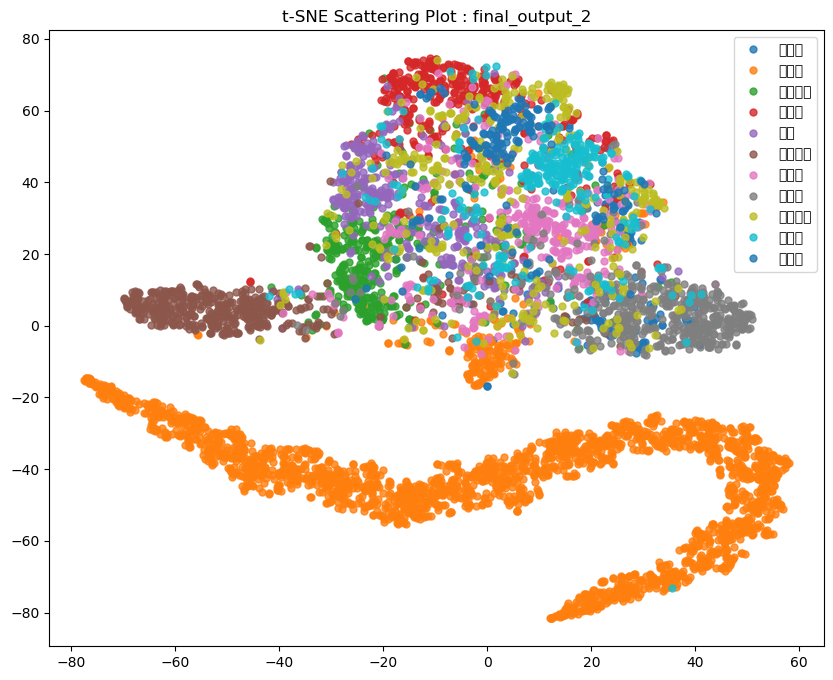

In [30]:
#%% t-SNE  #用train_data來做  
from keras.models import Model
from sklearn.manifold import TSNE

def plot_tSNE(model,layername,input_data,input_label,modelname='Model',label_name=['label one']):
    batch_size=64
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=model.get_layer(layername).output)
    intermediate_output = intermediate_layer_model.predict(
            input_data, batch_size=batch_size, verbose=1)
    
    Y = TSNE(n_components=2, init='random', random_state=0, perplexity=30, 
             verbose=1).fit_transform(intermediate_output.reshape(intermediate_output.shape[0],-1))
    #
    #Reshape the result of t-SNE for easy to use
    #train_label_draw = keras.utils.to_categorical(train_label_draw, num_classes=(label_for_draw+1))
    #test_label_draw = keras.utils.to_categorical(test_label_draw, num_classes=(label_for_draw+1))
    
    layer_output_label = np.argmax(input_label, axis=1)
    df = pd.DataFrame(dict(x=Y[:,0], y=Y[:,1], label=layer_output_label))
    groups = df.groupby('label')
    
    # Plot tSNE
    plt.cla()
    plt.clf()
    plt.cla()
    plt.close()
    fig, ax = plt.subplots(figsize=(10,8))
    
    ax.margins(0.05)  # Optional, just adds 5% padding to the autoscaling
    for label, group in groups:
        name = label_name[label]
        point,=ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name, alpha=0.8)
    
    plt.title('t-SNE Scattering Plot : {}'.format(layername))
    ax.legend(prop={'size': 10})
    fig.savefig(modelname +'_tSNE_{}.png'.format(layername),transparent=False, dpi=350)
    
    # Save tSNE Result
    writer = pd.ExcelWriter(modelname + '_tSNE_{}.xlsx'.format(layername))
    df.to_excel(writer,'Intensity',float_format='%.2f') # float_format 控制精度
    writer.save()

plot_tSNE(model,
          layername = 'final_output_2',
          input_data = train_data,
          input_label = train_label,
          modelname = '{}'.format(timestr),
          label_name = ["巴哥犬", "彼特犬","拉不拉多","牧羊犬","柯基","馬爾濟斯","博美犬","貴賓犬","黃金獵犬", \
                                  "臘腸犬",'吉娃娃'])

心中小劇場:
    
    明明主要是想要做預測吉娃娃，想說只做非吉娃娃和吉娃娃兩種太無聊了就試著分成11種狗來做，結果視覺化出來結果是彼特犬最好辨認，完全出乎意料

## 預測

In [32]:
result = model.predict_classes(test_data)

In [47]:
def my_predict(n):
    if result[n]==int(0):
        a='博美狗'
    elif result[n]==int(1):
        a='吉娃娃'
    elif result[n]==int(2):
        a='巴哥犬'
    elif result[n]==int(3):
        a='彼特犬'
    elif result[n]==int(4):
        a='拉不拉多'
    elif result[n]==int(5):
        a='牧羊犬'
    elif result[n]==int(6):
        a='柯基'
    elif result[n]==int(7):
        a='馬爾濟斯'
    elif result[n]==int(8):
        a='貴賓犬'
    elif result[n]==int(9):
        a='黃金獵犬'
    elif result[n]==int(10):
        a='臘腸犬'
    print('我可愛的 CNN 預測是', a)
    X = test_data[n].reshape(128,128,3)
    plt.imshow(X, cmap='Greys')
    

In [48]:
from ipywidgets import interact_manual

In [49]:
interact_manual(my_predict, n=(0, 1464))

interactive(children=(IntSlider(value=732, description='n', max=1464), Button(description='Run Interact', styl…

<function __main__.my_predict(n)>

# 結語 :
本來是要辨識出是否為吉娃娃，但最後視覺化的資料圖顯示出比特犬的資料是較為突出的，而其他種狗類的資料聚集密度相當高，完全出乎我們意料。

我們思考可能造成此結果的原因有以下幾點:
    1. 彼特犬的特徵比其他狗的特徵還要明顯==>但我們用肉眼看其實每一種狗的特徵都滿明顯的，所以這個選項保留
    2. 資料太髒造成其他狗的預測無法準確執行==>如果要解決問題的話感覺就只能花錢或花時間自己去拍攝
    3. 對於t_SNE的操作不夠熟悉==>解決辦法:努力學習相關用法

心得:
    在做這個專案的過程中，我們遇到了許多難題
    第一個遇到難題是爬蟲，因為組內的人有寫爬蟲的經驗不多，所以是一大挑戰。
    第二個難題是資料清理，在成千上萬的狗圖片中要把每一種分類及刪除是一件相當枯燥且耗時間的事
    第三個難題是結果與預期不相符，好不容易做出來的結果與自己的預期不相符真的滿令人傻眼的